In [47]:
import os
import subprocess
# 设置BAM文件目录
bed_dir = "/data/haocheng/data/bam/result/"
bed_work="/data/haocheng/data/bam/result/work"
bed_files = sorted([f for f in os.listdir(bed_dir) if f.endswith('.bed')])
# 获取第一个和第二个BAM文件的路径
bed_file1 = os.path.join(bed_dir, bed_files[0])
bed_file2 = os.path.join(bed_dir, bed_files[1])
# 定义排序后的输出文件路径，使用固定名称
sorted_bed_file1 = os.path.join(bed_work, "sorted_file1.bed")
sorted_bed_file2 = os.path.join(bed_work, "sorted_file2.bed")


In [42]:
# 使用bedtools sort命令对第一个BED文件排序，并将结果重定向到输出文件
with open(sorted_bed_file1, 'w') as out1:
    subprocess.run(["bedtools", "sort", "-i", bed_file1], stdout=out1)
# 使用bedtools sort命令对第二个BED文件排序，并将结果重定向到输出文件
with open(sorted_bed_file2, 'w') as out2:
    subprocess.run(["bedtools", "sort", "-i", bed_file2], stdout=out2)
print(f"Sorted files saved as {sorted_bed_file1} and {sorted_bed_file2}")


Sorted files saved as /data/haocheng/data/bam/result/work/sorted_file1.bed and /data/haocheng/data/bam/result/work/sorted_file2.bed


In [43]:
# 定义unionbedg的输出文件路径
union_bed_file = os.path.join(bed_work, "unionbedg_output.bed")
# 使用bedtools unionbedg命令对两个排序后的BED文件进行叠加，并将结果重定向到输出文件
with open(union_bed_file, 'w') as out:
    subprocess.run([
        "bedtools", "unionbedg",
        "-i", sorted_bed_file1, sorted_bed_file2,
        # "-header",  # 如果需要保留头部信息可以添加这个选项
    ], stdout=out)

print(f"Unionbedg output saved as {union_bed_file}")


Unionbedg output saved as /data/haocheng/data/bam/result/work/unionbedg_output.bed


In [44]:

# 定义最终处理后的输出文件路径
final_output_file = os.path.join(bed_work, "final_output.bed")
# 使用awk进行操作，将第1-3列保留，并将第4列和第5列相加，输出到新的文件中
awk_command = f"awk '{{print $1\"\\t\"$2\"\\t\"$3\"\\t\"($4 + $5)}}' {union_bed_file} > {final_output_file}"
subprocess.run(awk_command, shell=True)
print(f"Final output saved as {final_output_file}")

Final output saved as /data/haocheng/data/bam/result/work/final_output.bed


In [45]:
bed_files = bed_files[2:]  

In [46]:
while bed_files:
    next_bed = os.path.join(bed_dir, bed_files[0])  # 获取下一个 BAM 文件的路径
    print(f"现在正在处理数据: {next_bed}")
    with open(sorted_bed_file1, 'w') as out1:
     subprocess.run(["bedtools", "sort", "-i", final_output_file], stdout=out1)
    with open(sorted_bed_file2, 'w') as out2:
     subprocess.run(["bedtools", "sort", "-i", next_bed], stdout=out2)
    print(f"Sorted files saved as {sorted_bed_file1} and {sorted_bed_file2}")
    # 定义unionbedg的输出文件路径
    union_bed_file = os.path.join(bed_work, "unionbedg_output.bed")
    # 使用bedtools unionbedg命令对两个排序后的BED文件进行叠加，并将结果重定向到输出文件
    with open(union_bed_file, 'w') as out:
        subprocess.run([
            "bedtools", "unionbedg",
            "-i", sorted_bed_file1, sorted_bed_file2,
            # "-header",  # 如果需要保留头部信息可以添加这个选项
        ], stdout=out)
    print(f"Unionbedg output saved as {union_bed_file}")
    # 定义最终处理后的输出文件路径
    final_output_file = os.path.join(bed_work, "final_output.bed")
    # 使用awk进行操作，将第1-3列保留，并将第4列和第5列相加，输出到新的文件中
    awk_command = f"awk '{{print $1\"\\t\"$2\"\\t\"$3\"\\t\"($4 + $5)}}' {union_bed_file} > {final_output_file}"
    subprocess.run(awk_command, shell=True)
    print(f"Final output saved as {final_output_file}")
    bed_files = bed_files[1:]  # 删除第一个元素

现在正在处理数据: /data/haocheng/data/bam/result/GM_12.bed
Sorted files saved as /data/haocheng/data/bam/result/work/sorted_file1.bed and /data/haocheng/data/bam/result/work/sorted_file2.bed
Unionbedg output saved as /data/haocheng/data/bam/result/work/unionbedg_output.bed
Final output saved as /data/haocheng/data/bam/result/work/final_output.bed
现在正在处理数据: /data/haocheng/data/bam/result/GM_35.bed
Sorted files saved as /data/haocheng/data/bam/result/work/sorted_file1.bed and /data/haocheng/data/bam/result/work/sorted_file2.bed
Unionbedg output saved as /data/haocheng/data/bam/result/work/unionbedg_output.bed
Final output saved as /data/haocheng/data/bam/result/work/final_output.bed
现在正在处理数据: /data/haocheng/data/bam/result/GMlast.bed
Sorted files saved as /data/haocheng/data/bam/result/work/sorted_file1.bed and /data/haocheng/data/bam/result/work/sorted_file2.bed
Unionbedg output saved as /data/haocheng/data/bam/result/work/unionbedg_output.bed
Final output saved as /data/haocheng/data/bam/resul

In [48]:
#0-10000 为 1000 一个区间，10000-80000 为 10000 一个区间，80000-150000 为一个区间
import numpy as np
import matplotlib.pyplot as plt

# 设置BED文件路径
bed_file = "/data/haocheng/data/bam/result/work/final_output.bed"

# 读取第四列数据
data = []
with open(bed_file, 'r') as file:
    for line in file:
        fields = line.strip().split()
        if len(fields) >= 4:
            data.append(float(fields[3]))

# 转换为NumPy数组
data = np.array(data)


In [54]:

# 设置区间边界
#bins = np.concatenate([np.arange(0, 10000, 1000), np.arange(10000, 80000, 10000), [80000, 150000]])
bins=1000
# 使用np.histogram统计每个区间的频率
hist, bin_edges = np.histogram(data, bins=bins)


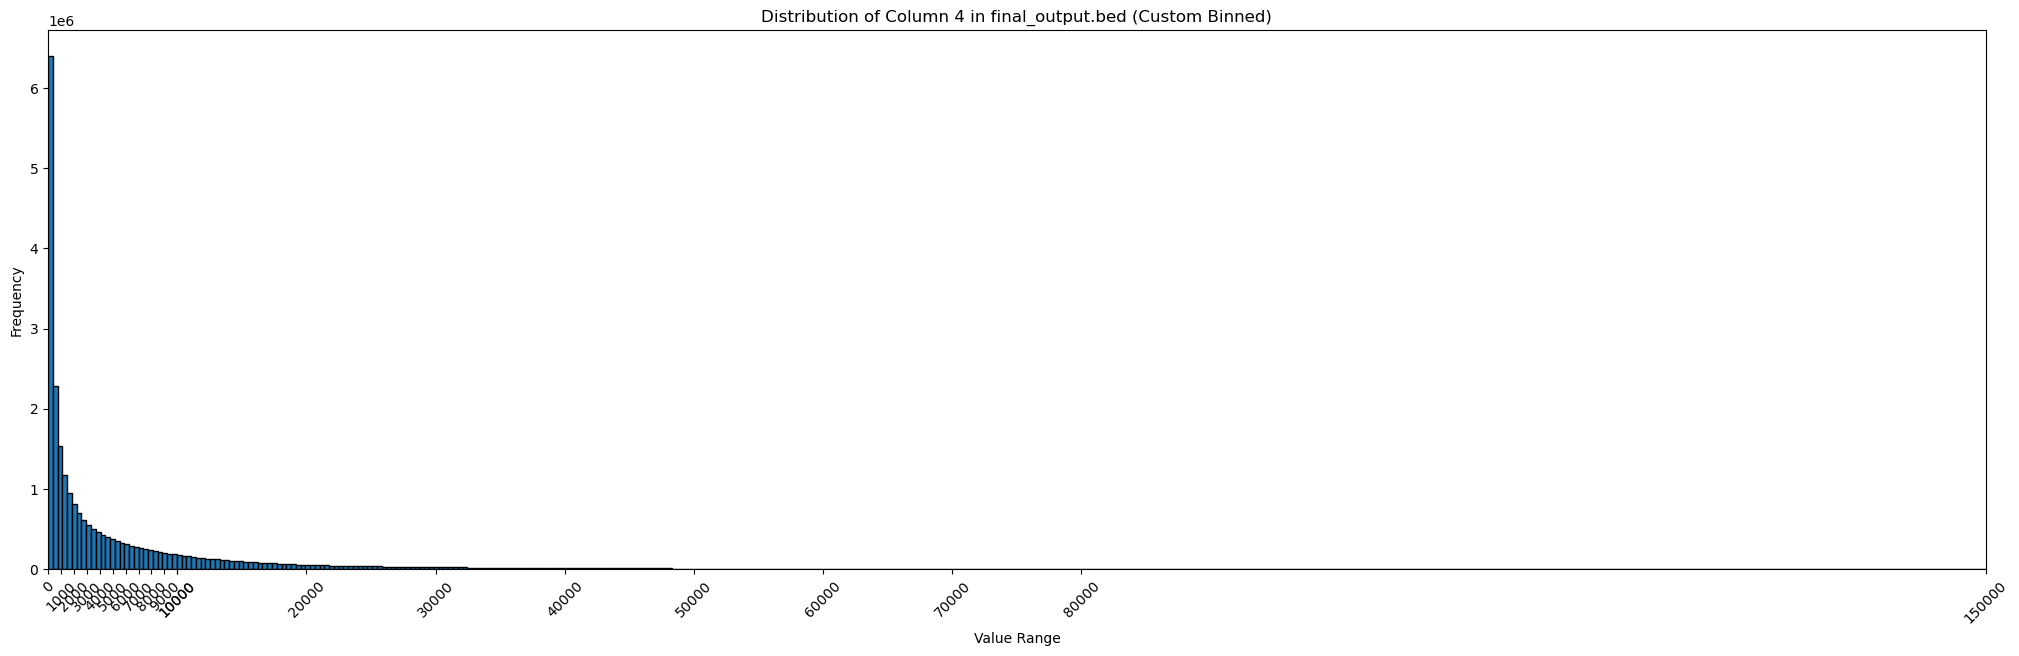

In [55]:
# 绘制条形图
plt.figure(figsize=(25, 7))  # 增加图形的大小
plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), edgecolor='black', align='edge')
plt.title('Distribution of Column 4 in final_output.bed (Custom Binned)')
plt.xlabel('Value Range')
plt.ylabel('Frequency')
# 设置 x 轴刻度，只标记每个区间的开头和结尾
x_ticks = np.concatenate([np.arange(0, 10001, 1000), np.arange(10000, 80001, 10000), [150000]])
x_labels = [str(int(b)) for b in x_ticks]

plt.xticks(x_ticks, x_labels, rotation=45)
plt.xlim(0, 150000)
plt.show()

In [59]:
import pandas as pd

# 读取 BED 文件
bed_file = "/data/haocheng/data/bam/result/all_no_chrEBV.bed"
bed_df = pd.read_csv(bed_file, sep='\t', header=None)

# 第四列为 bed_df[3]
values = bed_df[3]

# 归一化到 0-10 的范围
max_val = values.max()
bed_df[3] = (values) / (max_val ) * 100

# 保存为新文件
normalized_bed_file = "/data/haocheng/data/bam/result/all_no_chrEBV_normalized100.bed"
bed_df.to_csv(normalized_bed_file, sep='\t', header=False, index=False)


In [58]:
print(max_val)

368758
